# SEÑALES EXPONENCIALES Y SINUSOIDALES<a class="tocSkip">
## ANALISIS DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

Ejemplo 1. desplazamiento en tiempo, retraso
El sistema se aplica sustituyendo la variable t por t-1 en la entrada x, con la instrucción y = sym.Subs(x,t,t-1,evaluate=False)

In [1]:
# entradas desplazadas en t, revisar salida
# Sistemas Causales y NO causales en tiempo
# Hsu 1.5.D p17
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
equivalentes = [{'DiracDelta': lambda x: 1*(x==0)},
                'numpy']

In [2]:
# INGRESO
t = sym.Symbol('t', real=True)
x = sym.Symbol('x', real=True)

t0 = 0.75
# señales de entrada
f = sym.exp(-t)*sym.Heaviside(t)
w = f.subs(t,t-t0)

# sistema
y = sym.Subs(x,t,t-t0,evaluate=False)

# intervalo de t[a,b] para graficar
a = 0
b = 2*np.pi
muestras = 101

In [3]:
# PROCEDIMIENTO
# Sistema sobre señal de entrada
yf = y.subs(x,f).doit()
yw = y.subs(x,w).doit()

# Para gráfica
ti = np.linspace(a,b,muestras)
# señales de entrada
ft = sym.lambdify(t,f)
wt = sym.lambdify(t,w)

# señales de salida
yft = sym.lambdify(t,yf,modules=equivalentes)
ywt = sym.lambdify(t,yw,modules=equivalentes)

# evalua entradas ti
fi = ft(ti)
wi = wt(ti)
# evalua salidas ti
yfi = yft(ti)
ywi = ywt(ti)


yf:
                  -t            
2.11700001661267⋅ℯ  ⋅θ(t - 0.75)
yw:
                  -t           
4.48168907033807⋅ℯ  ⋅θ(t - 1.5)


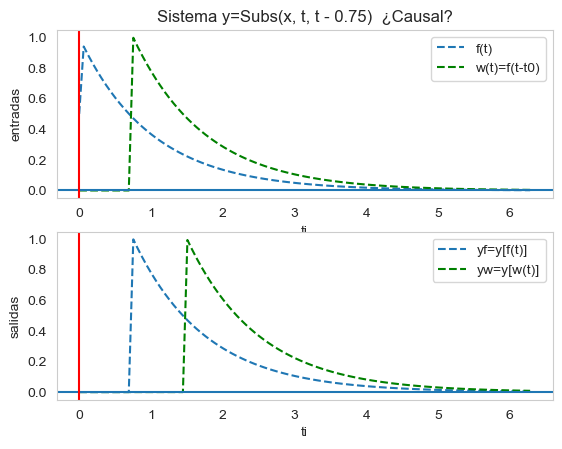

In [4]:
# SALIDA
print('yf:')
sym.pprint(yf)
print('yw:')
sym.pprint(yw)

# grafica
plt.subplot(211) # entradas
plt.plot(ti,fi,'--', label='f(t)')
plt.plot(ti,wi,'--',color='green',
         label='w(t)=f(t-t0)')
plt.axhline(0)
plt.axvline(0,color='red')
plt.xlabel('ti')
plt.ylabel('entradas')
plt.title('Sistema y='+str(y)+ '  ¿Causal?')
plt.legend()
plt.grid()

plt.subplot(212) # salidas
plt.plot(ti,yfi,'--',label='yf=y[f(t)]')
plt.plot(ti,ywi,'--',color='green',
         label='yw=y[w(t)]')
plt.axhline(0)
plt.axvline(0,color='red')
plt.xlabel('ti')
plt.ylabel('salidas')
plt.legend()
plt.grid()

plt.show()

Ejemplo 2. desplazamiento en tiempo, adelanto
lo mismo que el anterior pero con desplazamiento t+1 e intervalo ampliado en la parte izquierda del plano.

In [5]:
# Sistema sobre señal de entrada
y = x.subs(t,t+1)

In [6]:
# intervalo de t[a,b] para graficar
a = -2
b = 2*np.pi
muestras = 101

In [ ]:
Ejemplo 3. Sistema con amplitud variable en tiempo (AM)
                 y(t)=x(t)cos(t+1)

In [7]:
# entradas desplazadas en t, revisar salida
# Sistemas Causales y NO causales en tiempo
# Oppenheim 1.12 p47 pdf78
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
equivalentes = [{'DiracDelta': lambda x: 1*(x==0)},
                'numpy']

In [8]:
# INGRESO
t = sym.Symbol('t', real=True)
x = sym.Symbol('x', real=True)

t0 = 1.0
# señales de entrada
f = sym.exp(-t)*sym.Heaviside(t)
w = f.subs(t,t-t0)

# sistema
y = x*sym.cos(t+1)

# intervalo de t[a,b] para graficar
a = 0
b = 2*np.pi
muestras = 101

In [9]:
# PROCEDIMIENTO
# Sistema sobre señal de entrada
yf = y.subs(x,f).doit()
yw = y.subs(x,w).doit()

# Para gráfica
ti = np.linspace(a,b,muestras)
# señales de entrada
ft = sym.lambdify(t,f)
wt = sym.lambdify(t,w)

# señales de salida
yft = sym.lambdify(t,yf,modules=equivalentes)
ywt = sym.lambdify(t,yw,modules=equivalentes)

# evalua entradas ti
fi = ft(ti)
wi = wt(ti)
# evalua salidas ti
yfi = yft(ti)
ywi = ywt(ti)

yf:
 -t                
ℯ  ⋅cos(t + 1)⋅θ(t)
yw:
                  -t                      
2.71828182845905⋅ℯ  ⋅cos(t + 1)⋅θ(t - 1.0)


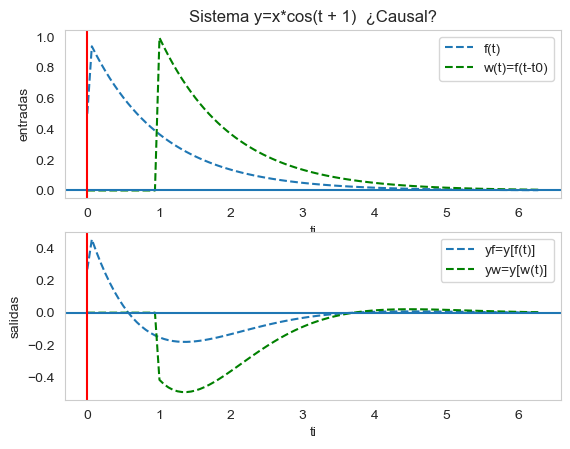

In [10]:
# SALIDA
print('yf:')
sym.pprint(yf)
print('yw:')
sym.pprint(yw)

# grafica
plt.subplot(211) # entradas
plt.plot(ti,fi,'--', label='f(t)')
plt.plot(ti,wi,'--',color='green',
         label='w(t)=f(t-t0)')
plt.axhline(0)
plt.axvline(0,color='red')
plt.xlabel('ti')
plt.ylabel('entradas')
plt.title('Sistema y='+str(y)+ '  ¿Causal?')
plt.legend()
plt.grid()

plt.subplot(212) # salidas
plt.plot(ti,yfi,'--',label='yf=y[f(t)]')
plt.plot(ti,ywi,'--',color='green',
         label='yw=y[w(t)]')
plt.axhline(0)
plt.axvline(0,color='red')
plt.xlabel('ti')
plt.ylabel('salidas')
plt.legend()
plt.grid()

plt.show()

Ejemplo 4. desplazamiento e inversión en tiempo

In [11]:
# entradas desplazadas en t, revisar salida
# Sistemas Causales y NO causales en tiempo
# Hsu 1.5.C p17
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
equivalentes = [{'DiracDelta': lambda x: 1*(x==0)},
                'numpy']

In [12]:
# INGRESO
t = sym.Symbol('t', real=True)
x = sym.Symbol('x', real=True)

t0 = 0.75
# señales de entrada
f = sym.cos(t)*sym.Heaviside(t)
w = f.subs(t,t-t0)

# sistema
y = x + sym.Subs(x,t,(5-t),evaluate=False)

# intervalo de t[a,b] para graficar
a = -2*np.pi
b = 2*np.pi
muestras = 101

In [13]:
# PROCEDIMIENTO
# Sistema sobre señal de entrada
yf = y.subs(x,f).doit()
yw = y.subs(x,w).doit()

# Para gráfica
ti = np.linspace(a,b,muestras)
# señales de entrada
ft = sym.lambdify(t,f)
wt = sym.lambdify(t,w)

# señales de salida
yft = sym.lambdify(t,yf,modules=equivalentes)
ywt = sym.lambdify(t,yw,modules=equivalentes)

# evalua entradas ti
fi = ft(ti)
wi = wt(ti)
# evalua salidas ti
yfi = yft(ti)
ywi = ywt(ti)

yf:
cos(t)⋅θ(t) + cos(t - 5)⋅θ(5 - t)
yw:
cos(t - 4.25)⋅θ(4.25 - t) + cos(t - 0.75)⋅θ(t - 0.75)


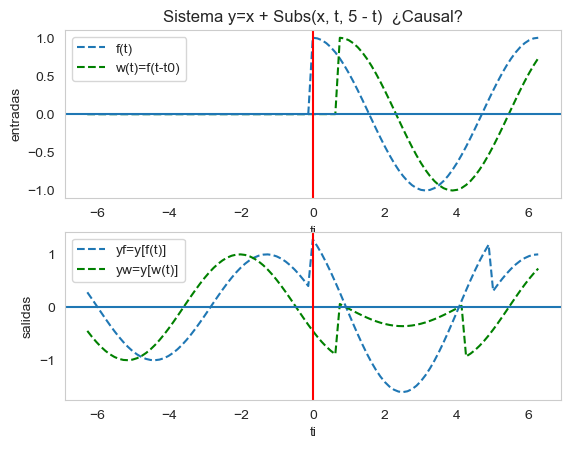

In [14]:
# SALIDA
print('yf:')
sym.pprint(yf)
print('yw:')
sym.pprint(yw)

# grafica
plt.subplot(211) # entradas
plt.plot(ti,fi,'--', label='f(t)')
plt.plot(ti,wi,'--',color='green',
         label='w(t)=f(t-t0)')
plt.axhline(0)
plt.axvline(0,color='red')
plt.xlabel('ti')
plt.ylabel('entradas')
plt.title('Sistema y='+str(y)+ '  ¿Causal?')
plt.legend()
plt.grid()

plt.subplot(212) # salidas
plt.plot(ti,yfi,'--',label='yf=y[f(t)]')
plt.plot(ti,ywi,'--',color='green',
         label='yw=y[w(t)]')
plt.axhline(0)
plt.axvline(0,color='red')
plt.xlabel('ti')
plt.ylabel('salidas')
plt.legend()
plt.grid()

plt.show()